In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, x, y):
        self.w_ = np.zeros(1+x.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1 ,-1)

In [53]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()
# from sklearn import datasets
# iris = datasets.load_iris()
# x = iris.data[:100,[0,1]]
# y= iris.target[:100]
# df = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


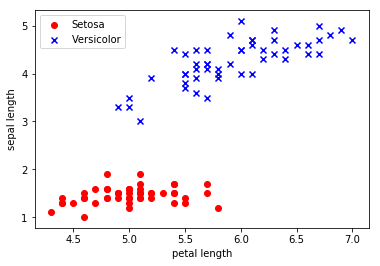

In [62]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0,2]].values
plt.scatter(x[:50, 0], x[:50, 1], color = 'r', marker = 'o', label = 'Setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color = 'b', marker = 'x', label = 'Versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc = 'upper left')
plt.show()

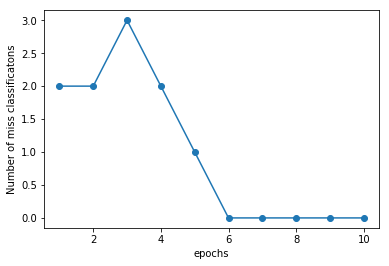

In [63]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(x, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('Number of miss classificatons')
plt.show()

In [64]:
from matplotlib.colors import ListedColormap

def plot_decision_region(x, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.04, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y==cl, 1], alpha = 0.8, cmap = cmap(idx), marker = markers[idx], label = cl)

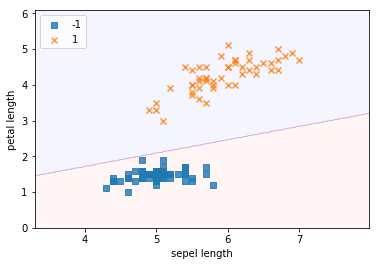

In [65]:
plot_decision_region(x, y, classifier = ppn)
plt.xlabel('sepel length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')
plt.show()